<a href="https://colab.research.google.com/github/RebuniTech/nlp-2022/blob/main/NLP_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Downloading Dataset into Colab Enviroment
!curl "https://raw.githubusercontent.com/RebuniTech/Sms_SPam-detection/main/sms_dataset.tsv" --output sms_dataset.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  501k  100  501k    0     0  7380k      0 --:--:-- --:--:-- --:--:-- 7380k


In [ ]:
df = pd.read_csv('sms_dataset.tsv', sep='\t')
print("Total Dataset:", len(df))

Total Dataset: 5572


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

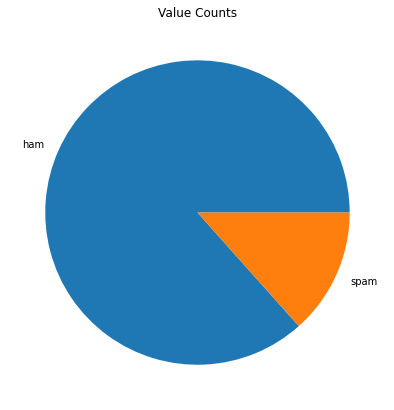

In [ ]:
#plt.figure(, dpi=75)
df.label.value_counts().plot(kind='pie', figsize=(10, 7))
plt.title('Value Counts')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
X = df.message # X_feature
y = df.label # y_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

count_vectorizer.fit(X_train)
X_train_cv = count_vectorizer.transform(X_train)
tfidf_transformer.fit(X_train_cv)
X_train_tfidf = tfidf_transformer.transform(X_train_cv)

X_test_cv = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_cv)

# Using Naive Bayes

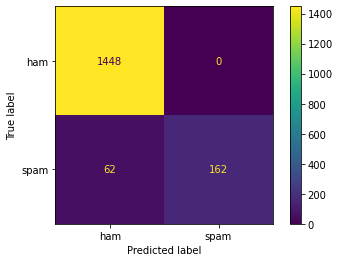

In [ ]:
naiv_bayes = MultinomialNB()
naiv_bayes.fit(X_train_tfidf, y_train)

prediction = naiv_bayes.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(naiv_bayes, X_test_tfidf, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



# Using Decision Tree

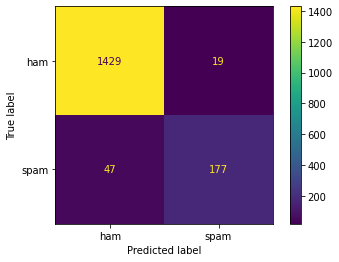

In [ ]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train_tfidf, y_train)
prediction = dt_cls.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(dt_cls, X_test_tfidf, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1448
        spam       0.90      0.79      0.84       224

    accuracy                           0.96      1672
   macro avg       0.94      0.89      0.91      1672
weighted avg       0.96      0.96      0.96      1672



# Using Linear SVC 

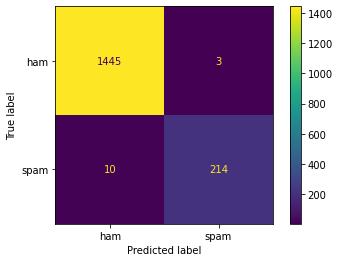

In [ ]:
lsvc = LinearSVC()
svc = lsvc.fit(X_train_tfidf, y_train)
prediction = lsvc.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(lsvc, X_test_tfidf, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, prediction))
print("Accurancy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672

Accurancy:  0.9922248803827751
